In [2]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [3]:
X = np.array([
    [10, 11, 8, 3, 2, 1],   # Gene 1
    [6, 4, 5, 3, 2.8, 1]    # Gene 2
])

X
X.shape

array([[10. , 11. ,  8. ,  3. ,  2. ,  1. ],
       [ 6. ,  4. ,  5. ,  3. ,  2.8,  1. ]])

(2, 6)

In [4]:
X_mean = np.mean(X, axis=1, keepdims=True)
X_mean
X_mean.shape

array([[5.8333],
       [3.6333]])

(2, 1)

In [5]:
X_centered = X - X_mean
X_centered
X_centered.shape

array([[ 4.1667,  5.1667,  2.1667, -2.8333, -3.8333, -4.8333],
       [ 2.3667,  0.3667,  1.3667, -0.6333, -0.8333, -2.6333]])

(2, 6)

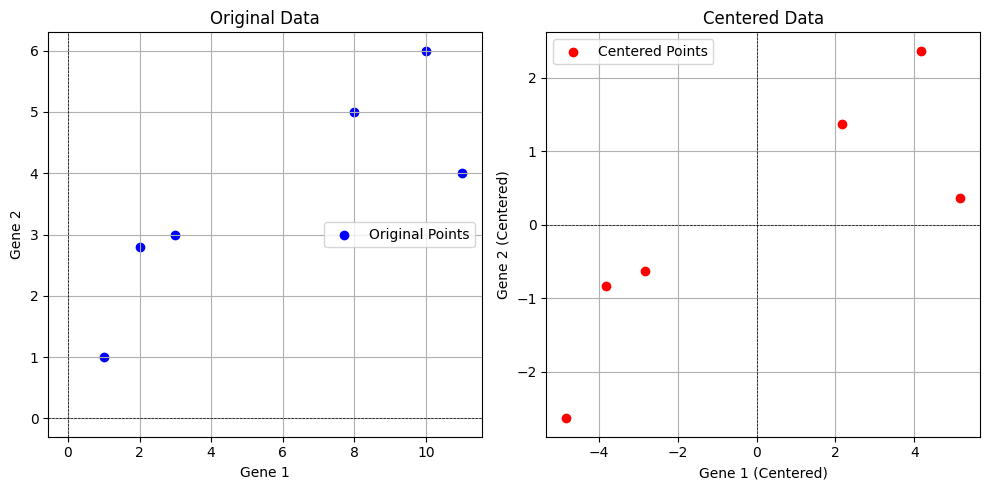

In [6]:
def plot_data(X, X_centered):
  import matplotlib.pyplot as plt

  plt.figure(figsize=(10, 5))

  # Original data
  plt.subplot(1, 2, 1)
  plt.title('Original Data')
  plt.scatter(X[0], X[1], color='blue', label='Original Points')
  plt.xlabel('Gene 1')
  plt.ylabel('Gene 2')
  plt.axhline(0, color='black', lw=0.5, ls='--')
  plt.axvline(0, color='black', lw=0.5, ls='--')
  plt.grid()
  plt.legend()

  # Centered data
  plt.subplot(1, 2, 2)
  plt.title('Centered Data')
  plt.scatter(X_centered[0], X_centered[1], color='red', label='Centered Points')
  plt.xlabel('Gene 1 (Centered)')
  plt.ylabel('Gene 2 (Centered)')
  plt.axhline(0, color='black', lw=0.5, ls='--')
  plt.axvline(0, color='black', lw=0.5, ls='--')
  plt.grid()
  plt.legend()

  plt.tight_layout()
  plt.show()


plot_data(X, X_centered)

In [8]:
n = X.shape[1]
C = 1/n * X_centered @ X_centered.T
C
C.shape

array([[15.8056,  5.4056],
       [ 5.4056,  2.6056]])

(2, 2)

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(C)

sorted_indices = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices].T  # transpose to have eigenvectors as rows

for i in range(len(eigenvalues)):
  print(f"Eigenvalue {i+1}: {eigenvalues[i]:.4f}")
  print(f"Eigenvector {i+1}:\n{eigenvectors[i]}")
  print(f"Variance explained by eigenvector {i+1}: {eigenvalues[i] / np.sum(eigenvalues) * 100:.2f}%\n")

Eigenvalue 1: 17.7367
Eigenvector 1:
[0.9417 0.3364]
Variance explained by eigenvector 1: 96.34%

Eigenvalue 2: 0.6744
Eigenvector 2:
[-0.3364  0.9417]
Variance explained by eigenvector 2: 3.66%



In [10]:
X_projected = eigenvectors[:1] @ X_centered
X_projected

X_reconstructed = eigenvectors[:1].T @ X_projected + X_mean
X_reconstructed

X

loss = np.mean((X - X_reconstructed) ** 2)
print(f"Reconstruction loss: {loss:.4f}")

array([[ 4.72  ,  4.9889,  2.5002, -2.8812, -3.8902, -5.4375]])

array([[10.2782, 10.5314,  8.1878,  3.12  ,  2.1698,  0.7128],
       [ 5.2213,  5.3117,  4.4744,  2.664 ,  2.3246,  1.804 ]])

array([[10. , 11. ,  8. ,  3. ,  2. ,  1. ],
       [ 6. ,  4. ,  5. ,  3. ,  2.8,  1. ]])

Reconstruction loss: 0.3372


In [11]:
X_projected = eigenvectors[:2] @ X_centered
X_projected

X_reconstructed = eigenvectors[:2].T @ X_projected + X_mean
X_reconstructed

X

loss = np.mean((X - X_reconstructed) ** 2)
print(f"Reconstruction loss: {loss:.4f}")

array([[ 4.72  ,  4.9889,  2.5002, -2.8812, -3.8902, -5.4375],
       [ 0.8269, -1.3929,  0.5581,  0.3568,  0.5049, -0.8538]])

array([[10. , 11. ,  8. ,  3. ,  2. ,  1. ],
       [ 6. ,  4. ,  5. ,  3. ,  2.8,  1. ]])

array([[10. , 11. ,  8. ,  3. ,  2. ,  1. ],
       [ 6. ,  4. ,  5. ,  3. ,  2.8,  1. ]])

Reconstruction loss: 0.0000
